In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import seaborn as sns
import os
import re

In [2]:
# Declare the file name and stuff here

###

s1 = "E:/Old Downloads Folder/Research Stuff/Jupyter Notebooks/Coordination Analysis Data/Nashville/"

###


In [3]:
def findScale():
    
    # Access the scale file of your zip code to find the Ovito -> Real world scale. Make sure to update
    # filepaths as necessary
    s = 'E:/Old Downloads Folder/Research Stuff/Jupyter Notebooks/Coords Folder/Weather Station Coords/Nashville/'
    
    scale = 0

    openpath = s + code + '_scale.txt'

    with open(openpath) as f:

        f = f.read()

        scale = re.sub('[^0-9]', '', f)
        
        return int(scale)

In [4]:
def findFirstPeak(dataframe, convergeVal):
    
    # This function finds the index value of the end of the first peak in your dataframe
    
    maxVal = frame['y'].max()
    gate = 1/2*(maxVal - convergeVal) + convergeVal
    prev_val = 0
    passGate = False
    
    for index, data in dataframe.iterrows():

        y_val = data['y']

        if y_val < gate and prev_val > gate:

            passGate = True

        if passGate == True:

            if prev_val < y_val and (y_val - prev_val) > 0.01 * (maxVal - convergeVal):

                return (index)

        prev_val = y_val

In [5]:
def firstPeakIntegral(dataFrame, window_length, polyorder):
    
    # This function calculates the integral of the data set passed in
    
    yhat = savgol_filter(dataFrame['y'], window_length = window_length, polyorder = polyorder)
    
    changed_frame = dataFrame.copy()
    changed_frame['y'] = yhat
    
    convergeVal = dataFrame['y'][-1:].item()
    
    i = findFirstPeak(changed_frame, convergeVal = convergeVal)
    
    x_vals = dataFrame['x'][:i].multiply(findScale())
    
    normal_factor = x_vals[-1:].item()
    
    y_vals = dataFrame['y'][:i]
    
    ax = sns.lineplot(x = x_vals, y = y_vals)
    ax.set_title('First Peak of ' + code)
    ax.set(xlabel = 'Distance (ft)', ylabel = 'g(r)')
        
    return(np.trapz(x = x_vals, y = y_vals) /normal_factor)

In [6]:
# firstPeakIntegral(frame, 5, 3)

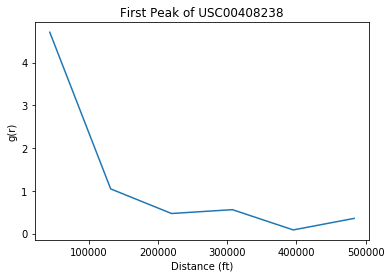

In [7]:
# This is just something I wrote so I don't have to type in all the file names myself. It loops through all the 
# files in the directory except the New York test one

for file in os.listdir(s1):
    
    code = file[:-4]

    with open(s1 + code + '.txt') as f:

        frame = pd.read_csv(f, sep = ' ', names = ['x', 'y'])

    line = firstPeakIntegral(frame, 5, 3)

    with open(s1 + code + '_first_peak.txt', 'w+') as file:

        file.write(str(line))